In [1]:
##############################################
import sys,os
import numpy as np
import pylab as py
##############################################
import pylab as py
from  matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 
##############################################
PATH='../python/'
sys.path.append(PATH)  # path of the JAMLIB python folder is located
from corelib import JAMLIB
##############################################
LHAPDF_path='/home/accardi/Apps/LHAPDF-6.1.5/lib/python2.7/site-packages'
sys.path.append(LHAPDF_path)
import lhapdf
##############################################

## Plotting range

In [89]:
z = np.linspace(0.05,1,100)

## Using JAMLIB interface

In [3]:
JAMffpi=JAMLIB(PATH+'JAM16/FFpion')
JAMffk=JAMLIB(PATH+'JAM16/FFkaon')

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading tables [100%]
##################

In [92]:
#zD(z) for kaons and pions using JAM

post = 0
Q2 = 10.

zpi_JAM = []
zk_JAM = []
for f in ['g','up','dp','sp','cp','bp']:
  zpi_JAM.append([JAMffpi.get_XF(post,f,z[i],Q2) for i in range(len(z))])
  zk_JAM.append([JAMffk.get_XF(post,f,z[i],Q2) for i in range(len(z))])

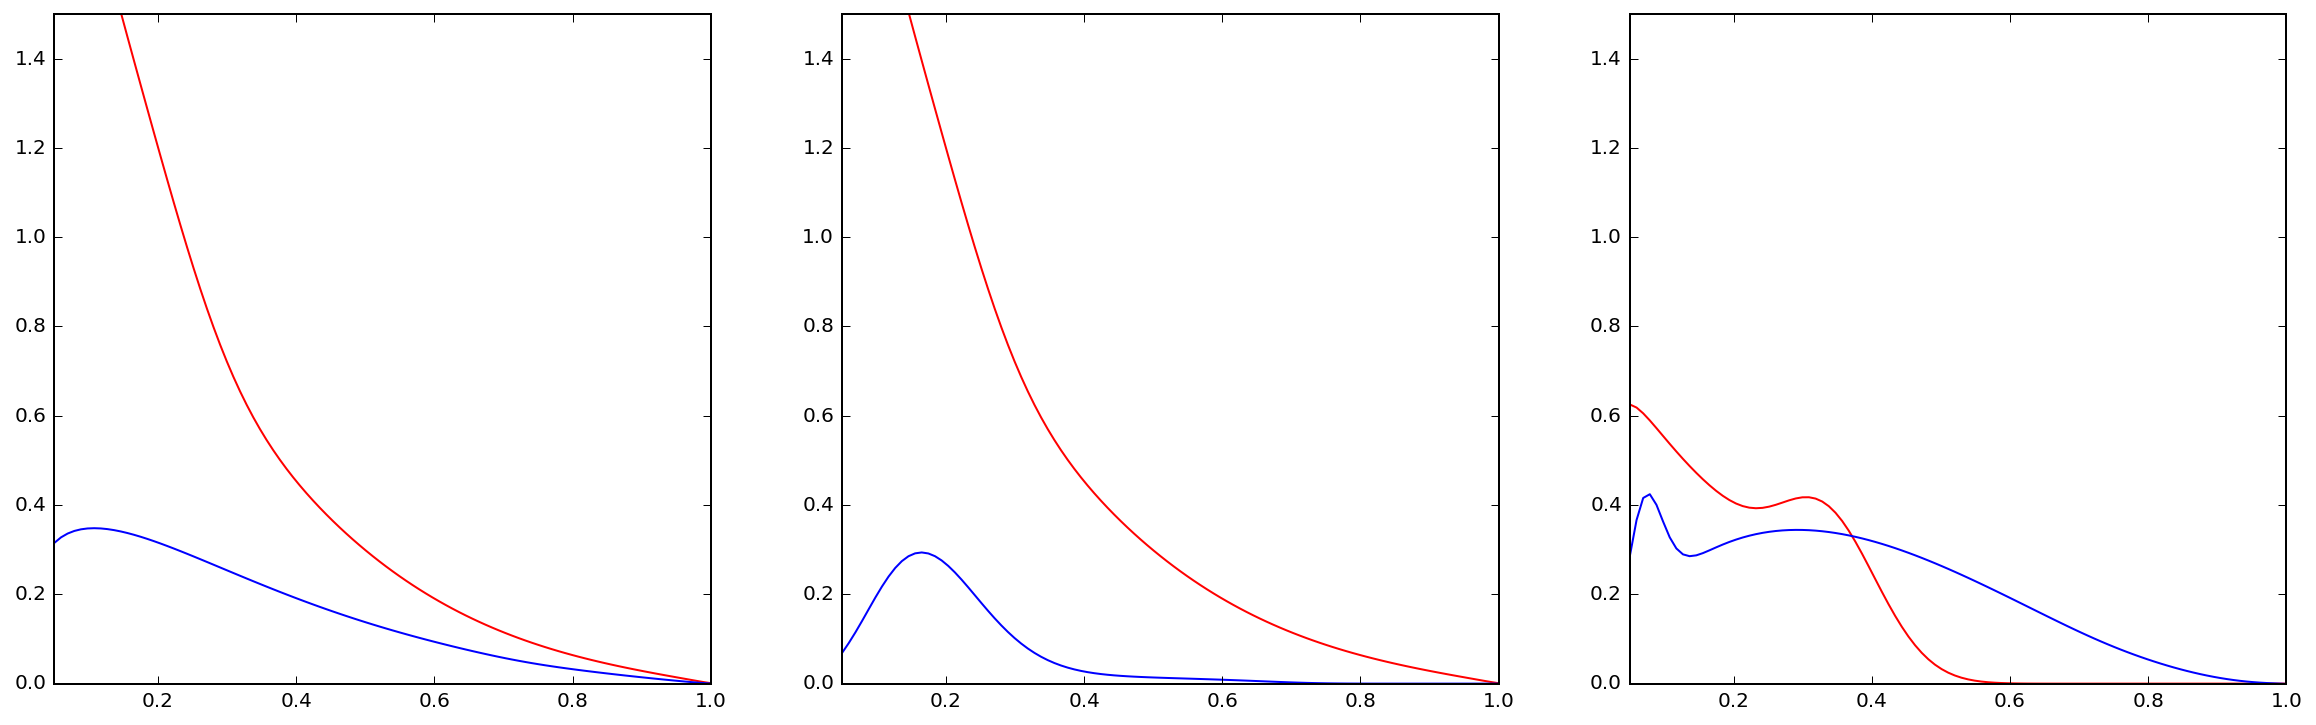

In [93]:
#Plot using JAM

fig = plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.plot(z,zpi_JAM[1],'r-',label='u $\pi$')
plt.plot(z,zk_JAM[1],'b-',label='u $K$')
plt.axis([0.05,1,0,1.5]);

plt.subplot(1,3,2)
plt.plot(z,zpi_JAM[2],'r-',label='d $\pi$')
plt.plot(z,zk_JAM[2],'b-',label='d $K$')
plt.axis([0.05,1,0,1.5]);

plt.subplot(1,3,3)
plt.plot(z,zpi_JAM[3],'r-',label='s $\pi$')
plt.plot(z,zk_JAM[3],'b-',label='s $K$')
plt.axis([0.05,1,0,1.5]);
#plt.show()

## Using LHAPDF interface

In [102]:
member = 1
Q2 = 10.

lhapdfffk = lhapdf.mkPDF("JAM16FF_K_Ceven",member)
lhapdfffpi = lhapdf.mkPDF("JAM16FF_pi_Ceven",member)

zpi_lha = []
zk_lha = []
for f in [21,2,1,3,4,5]:
  zpi_lha.append([lhapdfffpi.xfxQ2(f,z[i],Q2) for i in range(len(z))])
  zk_lha.append([lhapdfffk.xfxQ2(f,z[i],Q2) for i in range(len(z))])

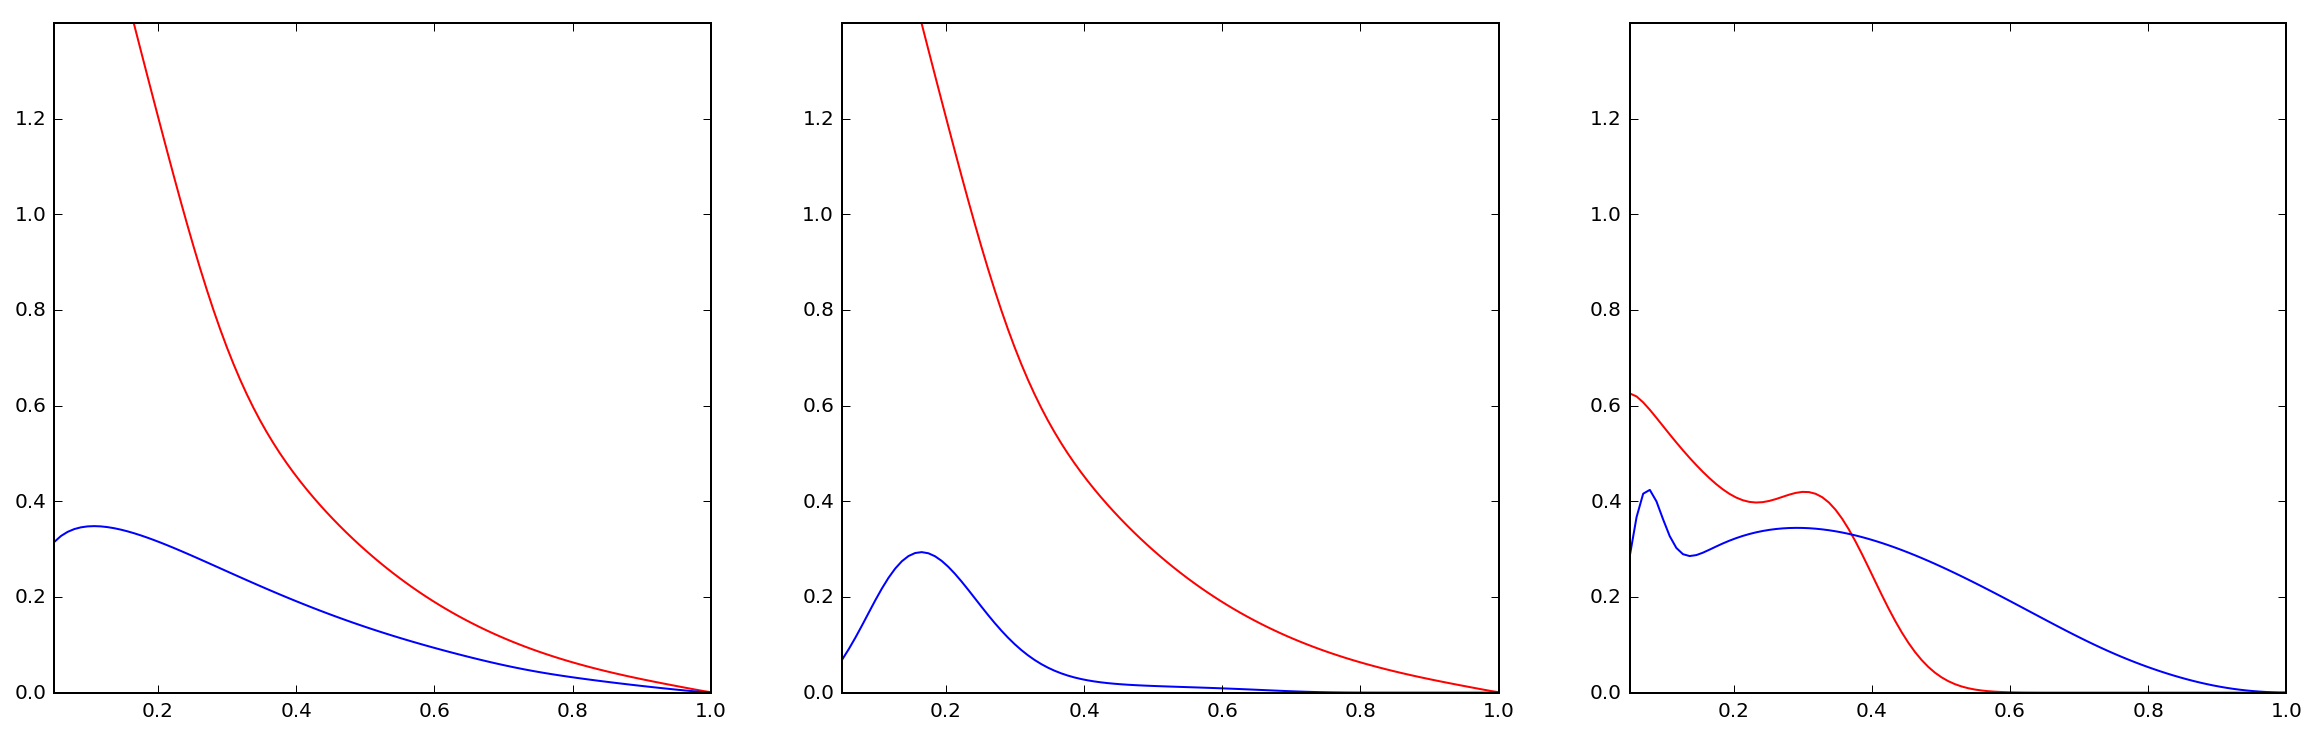

In [103]:
#Plot using lhapdf
fig = plt.figure(figsize=(20,6))

plt.subplot(1,3,1) # up
plt.plot(z,zpi_lha[1],'r-',label='u $\pi$') 
plt.plot(z,zk_lha[1],'b-',label='u $K$')
plt.axis([0.05,1,0,1.4])

plt.subplot(1,3,2)
plt.plot(z,zpi_lha[2],'r-',label='d $\pi$')
plt.plot(z,zk_lha[2],'b-',label='d $K$')
plt.axis([0.05,1,0,1.4])

plt.subplot(1,3,3)
plt.plot(z,zpi_lha[3],'r-',label='s $\pi$')
plt.plot(z,zk_lha[3],'b-',label='s $K$')
plt.axis([0.05,1,0,1.4])
plt.show()

## Ratios of LHAPDF / JAM interpolators

In [96]:
#Ratios JAM/lhapdf for u,d,s

rpi = []
rk = []
for f in [0,1,2,3,4,5]:
  rpi.append([zpi_JAM[f][i]/zpi_lha[f][i] for i in range(len(z))])
  rk.append([zk_JAM[f][i]/zk_lha[f][i] for i in range(len(z))])

-c:6: RuntimeWarning: divide by zero encountered in double_scalars
-c:7: RuntimeWarning: divide by zero encountered in double_scalars


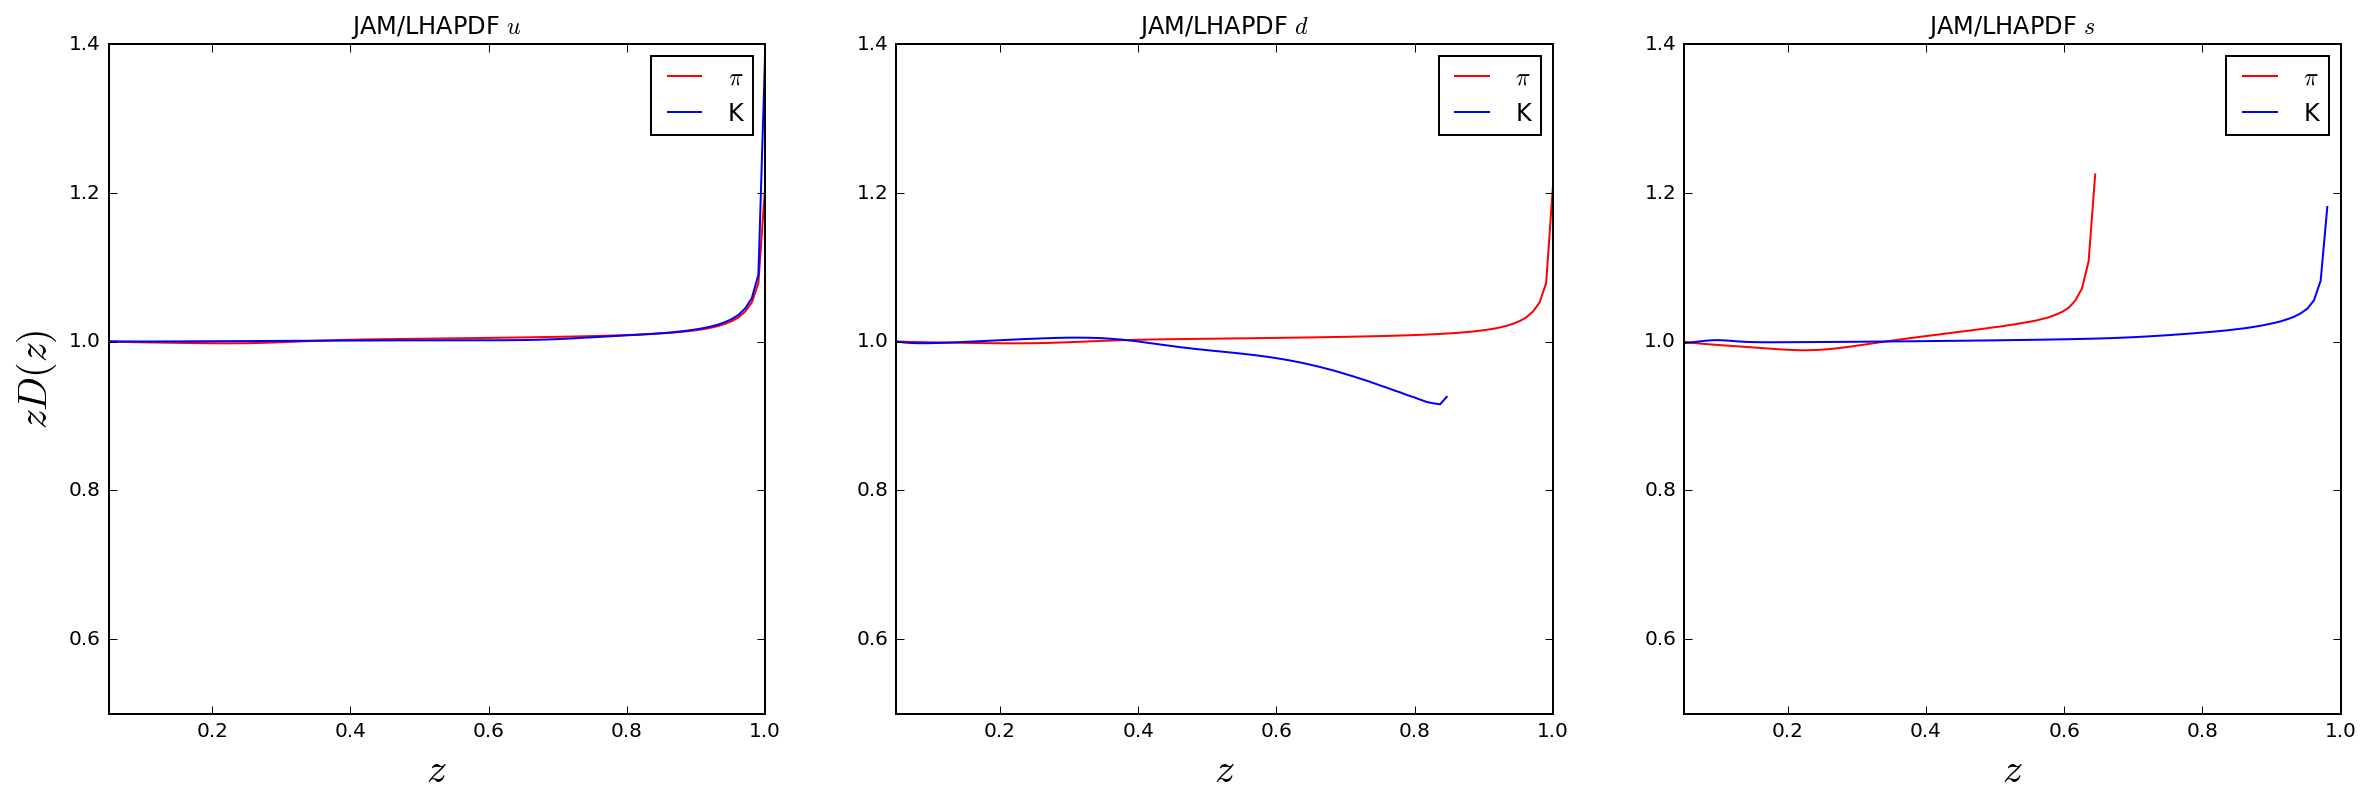

In [108]:
fig = plt.figure(figsize=(20,6))

plt.title('JAM/LHAPDF')

plt.subplot(1,3,1)

plt.title('JAM/LHAPDF $u$')
plt.plot(z,rpi[1],'r-',label='$\pi$')
plt.plot(z,rk[1],'b-',label='K')
plt.xlabel('$z$', fontsize=20) #Label x axis
plt.ylabel('$zD(z)$',fontsize=20) # Label y axis
plt.xlim([0.05,1])
plt.axis([0.05,1,0.5,1.4])
#plt.axis([0.05,1,1-2e-4,1+2e-4])
#plt.axis([0.05,1,0,2])

plt.legend()

plt.subplot(1,3,2)
plt.title('JAM/LHAPDF $d$')
plt.plot(z,rpi[2],'r-',label='$\pi$')
plt.plot(z,rk[2],'b-',label='K')
plt.xlabel('$z$', fontsize=20) #Label x axis
#plt.xlim([0.05,1])
plt.axis([0.05,1,0.5,1.4])
#plt.axis([0.05,1,1-2e-4,1+2e-4])
plt.legend()

plt.subplot(1,3,3)
plt.title('JAM/LHAPDF $s$')
plt.plot(z,rpi[3],'r-',label='$\pi$')
plt.plot(z,rk[3],'b-',label='K')
plt.xlabel('$z$', fontsize=20) #Label x axis
plt.axis([0.05,1,0.5,1.4])
#plt.axis([0.05,1,1-2e-4,1+2e-4])
#plt.xlim([0.05,1])
plt.legend()
plt.savefig('JAM_over_lhapdf.pdf')
plt.show()